In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2dcnn-images-data/UD/UD/D1432.png
/kaggle/input/2dcnn-images-data/UD/UD/D1924.png
/kaggle/input/2dcnn-images-data/UD/UD/D2195.png
/kaggle/input/2dcnn-images-data/UD/UD/D987.png
/kaggle/input/2dcnn-images-data/UD/UD/D1806.png
/kaggle/input/2dcnn-images-data/UD/UD/D2393.png
/kaggle/input/2dcnn-images-data/UD/UD/D1552.png
/kaggle/input/2dcnn-images-data/UD/UD/D1441.png
/kaggle/input/2dcnn-images-data/UD/UD/D669.png
/kaggle/input/2dcnn-images-data/UD/UD/D1454.png
/kaggle/input/2dcnn-images-data/UD/UD/D568.png
/kaggle/input/2dcnn-images-data/UD/UD/D1960.png
/kaggle/input/2dcnn-images-data/UD/UD/D881.png
/kaggle/input/2dcnn-images-data/UD/UD/D1892.png
/kaggle/input/2dcnn-images-data/UD/UD/D1007.png
/kaggle/input/2dcnn-images-data/UD/UD/D2022.png
/kaggle/input/2dcnn-images-data/UD/UD/D271.png
/kaggle/input/2dcnn-images-data/UD/UD/D1738.png
/kaggle/input/2dcnn-images-data/UD/UD/D793.png
/kaggle/input/2dcnn-images-data/UD/UD/D2002.png
/kaggle/input/2dcnn-images-data/UD/UD/D2117.pn

In [5]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.utils.multiclass import unique_labels
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense
import matplotlib.pyplot as plt
import random
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/opt/conda/lib/python3.10/site-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Sample files in directory: ['D']


In [12]:
fig = plt.gcf()

def plot_confusion_matrix(cm, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        title = 'Normalized confusion matrix' if normalize else 'Confusion matrix, without normalization'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')


<Figure size 640x480 with 0 Axes>

**Prediction Model**

In [13]:
def pred(model, Xtest, ytest):
    y_predicted = model.predict_classes(Xtest, verbose=2)
    y_actual = ytest
    cm = confusion_matrix(y_actual, y_predicted)
    cm_labels = ['Undamaged', 'Damaged']
    return plot_confusion_matrix(cm, classes=cm_labels, title='Confusion matrix'), print(classification_report(y_actual, y_predicted, target_names=cm_labels))


In [14]:
def load_labels(m):
    dfUD = pd.DataFrame(np.zeros((m, 1), dtype=int))
    dfD = pd.DataFrame(np.ones((m, 1), dtype=int))
    return dfUD, dfD






In [15]:
def load_imagesUD(dfUD,pathUD):
    imagesUD = []
    for i in dfUD.index.values:
        baseUD = os.path.sep.join([pathUD, "D{}.png".format(i + 1)])
       
        image = cv2.imread(baseUD) 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (150, 150))
       
        imagesUD.append(image) 
    return np.array(imagesUD)
def load_imagesD(dfD,pathD):
    imagesD = []
    for i in dfD.index.values:
        baseD = os.path.sep.join([pathD, "D{}.png".format(i + 1)])
       
        image = cv2.imread(baseD) # read the path using opencv
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (150, 150))
        
        imagesD.append(image) 
    return np.array(imagesD)

0
/kaggle/input/undamaged-data/UD/D1.png
1
/kaggle/input/undamaged-data/UD/D2.png


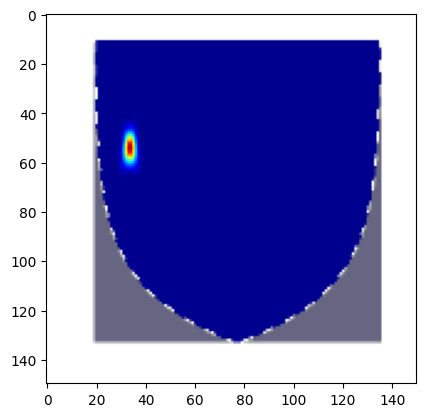

In [17]:
images = []
path = '/kaggle/input/undamaged-data/UD'
for i in range(2):
    print(i)
    base = os.path.sep.join([path, "D{}.png".format(i + 1)])
    print(base)
    image0 = cv2.imread(base) # read the path using opencv #,cv2.IMREAD_GRAYSCALE
    image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
    image0 = cv2.resize(image0, (150, 150))
    plt.imshow(image0) # use matplotlib to plot the image
    #image = image[:,:,np.newaxis] #This is convert (600,600) --> (600,600,1)
    images.append(image0)

In [18]:
np.array(images).shape

(2, 150, 150, 3)

In [19]:
def create_cnn(width, height, depth, filters=(16, 32, 64)):
    
    
    inputShape = (height, width, depth)
    chanDim = -1

    
    inputs = Input(shape=inputShape)
    x = inputs

   
    for f in filters:
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = Flatten()(x)

   
    model = Model(inputs, x, name="cnn_model")

    
    return model


**Data**

In [20]:
pathD = '/kaggle/input/damage-image/D'
pathUD = '/kaggle/input/undamaged-data/UD'

In [21]:
[dfUD,dfD] = load_labels(2500)
df = np.concatenate([dfUD, dfD], axis=0)
df.shape

(5000, 1)

In [22]:
print("[INFO] loading UD images...")
imagesUD = load_imagesUD(dfUD, pathUD) / 255.0

print("[INFO] loading D images...")
imagesD = load_imagesD(dfD, pathD) / 255.0

images = np.concatenate([imagesUD, imagesD], axis=0)
print(f"Images shape: {images.shape}")


[INFO] loading UD images...
[INFO] loading D images...
Images shape: (5000, 150, 150, 3)


**Train test split**

In [24]:
from sklearn.model_selection import train_test_split
split = train_test_split(df, images, test_size=0.25, random_state=42)
(trainAttr, testAttr, trainImages, testImages) = split

trainY = trainAttr
testY = testAttr
testXX=testImages

print(trainImages.shape)
print(testImages.shape)
print(trainY.shape)
print(testY.shape)

(3750, 150, 150, 3)
(1250, 150, 150, 3)
(3750, 1)
(1250, 1)


In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam


x = Dense(1, activation="sigmoid")(x) 

model = Model(inputs=cnn2d.input, outputs=x)


opt = Adam(learning_rate=1e-5)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['acc'])


In [24]:
print("[INFO] training model...")
history = model.fit(trainImages,trainY,validation_data=(testImages,testY), epochs=250, batch_size=16, verbose = 1)

[INFO] training model...
Epoch 1/250


I0000 00:00:1730752142.083460      87 service.cc:145] XLA service 0x59d90a85f9f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730752142.083511      87 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730752142.083515      87 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 15/235 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.5083 - loss: 0.7296

I0000 00:00:1730752146.791560      87 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - acc: 0.5020 - loss: 0.6992 - val_acc: 0.5008 - val_loss: 0.7586
Epoch 2/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.4998 - loss: 0.6812 - val_acc: 0.5008 - val_loss: 0.6863
Epoch 3/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.4957 - loss: 0.6287 - val_acc: 0.5008 - val_loss: 0.5950
Epoch 4/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.4931 - loss: 0.5811 - val_acc: 0.5008 - val_loss: 0.5718
Epoch 5/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.4975 - loss: 0.5665 - val_acc: 0.5120 - val_loss: 0.5635
Epoch 6/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.5511 - loss: 0.5617 - val_acc: 0.7352 - val_loss: 0.5599
Epoch 7/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.7388 - loss: 0.5585 - val_acc: 0.8416 - val_loss: 0.5573
Epoch 8/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.8515 - loss: 0.5568 - val_acc: 0.9024 - val_loss: 0.5561
Epoch 9/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - ac

In [25]:
model.save('2dcnn_model.h5')

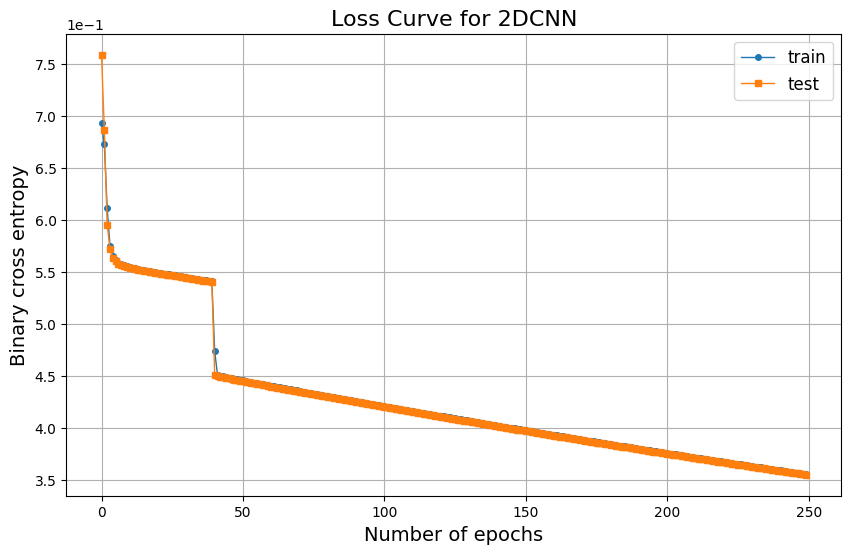

In [54]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(history.history['loss'], '-o', label='train', color='tab:blue', markersize=4, linewidth=1)
plt.plot(history.history['val_loss'], '-s', label='test', color='tab:orange', markersize=4, linewidth=1)

plt.title('Loss Curve for 2DCNN', fontsize=16)
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Binary cross entropy', fontsize=14)


plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


plt.grid(True)


plt.legend(fontsize=12)


plt.show()


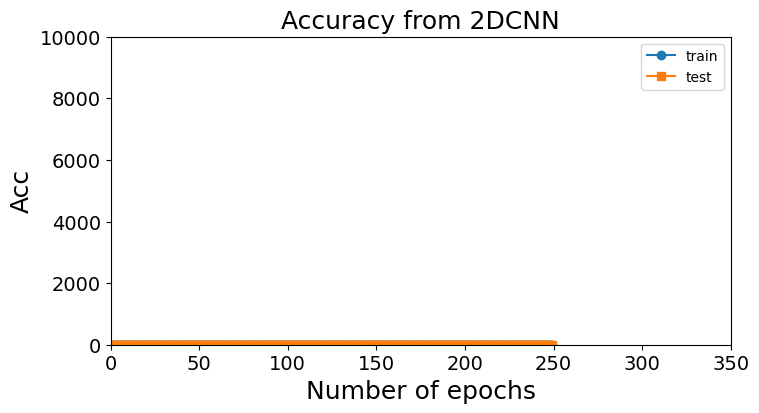

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(history.history['acc'],'-o')
plt.plot(history.history['val_acc'],'-s')
plt.title('Accuracy from 2DCNN',fontsize=18)
plt.ylabel('Acc',fontsize=18)
#plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of epochs',fontsize=18)
plt.legend(['train', 'test'], loc='upper right',fontsize=10)
plt.axis([0,350,0,10000])
plt.show()